## Objective:
    The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.


## Tasks:
    1.Data Cleaning and Preparation:
       ●	Load the dataset into a DataFrame or equivalent data structure.
       ●	Handle missing values appropriately (e.g., imputation, deletion).
       ●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
       ●	Detect and treat outliers if necessary.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('Cardiotocographic.csv')

In [5]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [4]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [7]:
for col in df.columns:
    df.fillna({col:df[col].mean()},inplace=True)

In [8]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

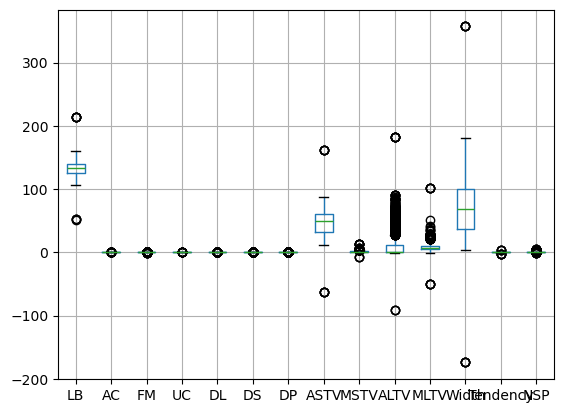

In [9]:
df.boxplot()
plt.show()

In [10]:
def outliercapping(df,col):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1 - 1.5*IQR
    upper=q3 + 1.5*IQR
    df[col]=df[col].apply(lambda x:upper if x > upper else lower if x < lower else x)
for col in df.select_dtypes(['int','float']).columns:
    outliercapping(df,col)

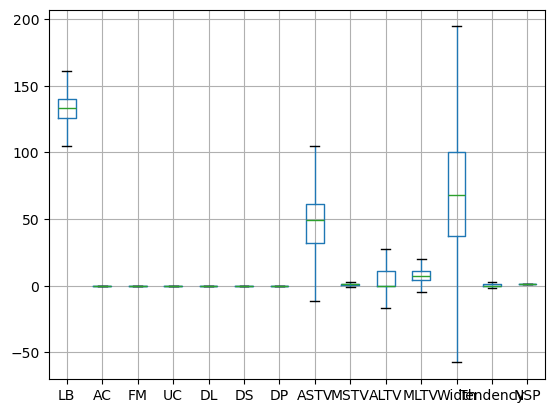

In [11]:
df.boxplot()
plt.show()

## 2.	Statistical Summary:
    ● Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).
    ● Highlight any interesting findings from this summary.


In [12]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.293725,0.003147,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.016212,70.321076,0.319662,1.0
std,9.930227,0.003826,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.046784,39.570633,0.621602,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


## 3.	Data Visualization:
    ● Create histograms or boxplots to visualize the distributions of various numerical variables.
    ● Use bar charts or pie charts to display the frequency of categories for categorical variables.
    ● Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.
    ● Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.


In [13]:
import seaborn as sns

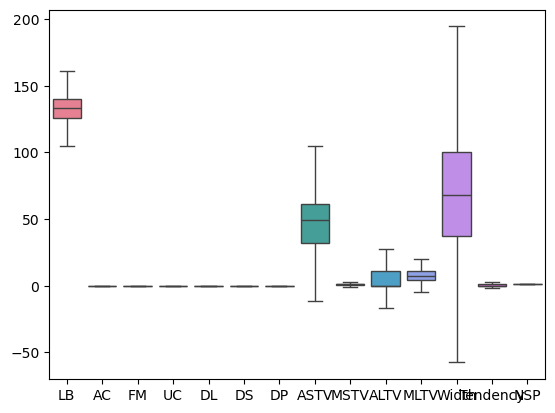

In [14]:
sns.boxplot(data=df)
plt.show()

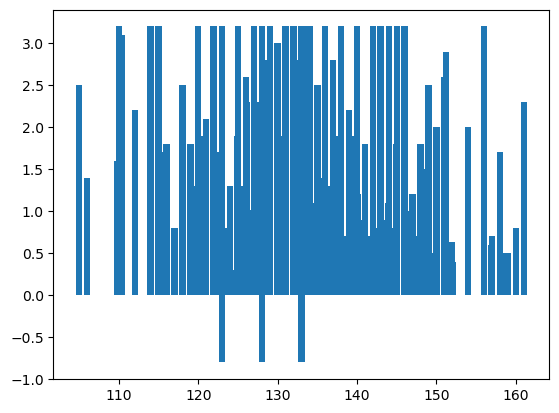

In [15]:
plt.bar(df["LB"],df["MSTV"])
plt.show()

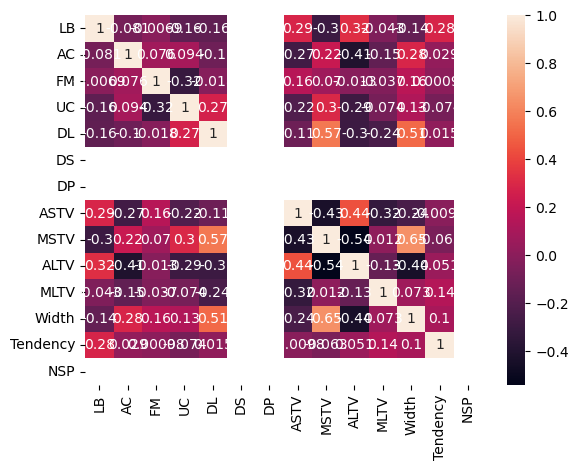

In [16]:
corr=df.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [20]:
sns.pairplot(df[["LB","AC","FM"]])
plt.show()

## 4.	Pattern Recognition and Insights:
    ● Identify any correlations between variables and discuss their potential implications.
    ● Look for trends or patterns over time if temporal data is available.


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
x=df.drop(columns=['NSP'])
vif['Features']=x.columns
vif['VIF']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

D:\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


In [36]:
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
0,LB,37.743577
7,ASTV,13.661686
8,MSTV,9.587128
11,Width,9.507875
10,MLTV,5.482722
3,UC,4.048788
4,DL,3.343311
1,AC,2.963159
9,ALTV,2.720877
2,FM,1.723936


In [39]:
vif.isnull().sum()

Features    0
VIF         0
dtype: int64

In [38]:
vif.dropna(inplace=True)

In [44]:
x=np.array(vif["VIF"])
print(x)
y=np.array(vif['Features'])
print(y)

[37.74357715  2.96315892  1.72393579  4.04878808  3.34331063 13.661686
  9.5871285   2.72087736  5.48272166  9.50787507  1.38636216]
['LB' 'AC' 'FM' 'UC' 'DL' 'ASTV' 'MSTV' 'ALTV' 'MLTV' 'Width' 'Tendency']


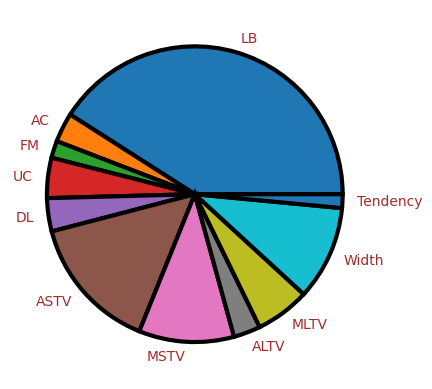

In [48]:
plt.pie(x,labels=y,textprops={"color":"brown",'size':10},wedgeprops={'edgecolor':"black","linewidth":3})
plt.show()